#Etape1: Classification : Prédiction du type de tumeur (Breast Cancer)

Étape 0 : Préparation

 Import des librairies principales

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import Librairies ML

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Étape 1 : Exploration

Présenter la structure du dataset (dimensions, types de données).

charger Dataset

In [24]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


Dimensions et types

In [4]:
print("Dimensions des données :", X.shape)
print("\nTypes de données :\n", X.dtypes)

Dimensions des données : (569, 30)

Types de données :
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64

Aperçu des données

In [5]:
display(X.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Statistiques de base

Donner une brève description des variables principales

In [6]:
display(X.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Vérifier les valeurs manquantes et les statistiques de base.


In [7]:
print("Valeurs manquantes :\n", X.isnull().sum())

Valeurs manquantes :
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


Étape 2 : Visualisation

Représenter la répartition des classes (tumeurs bénignes / malignes).

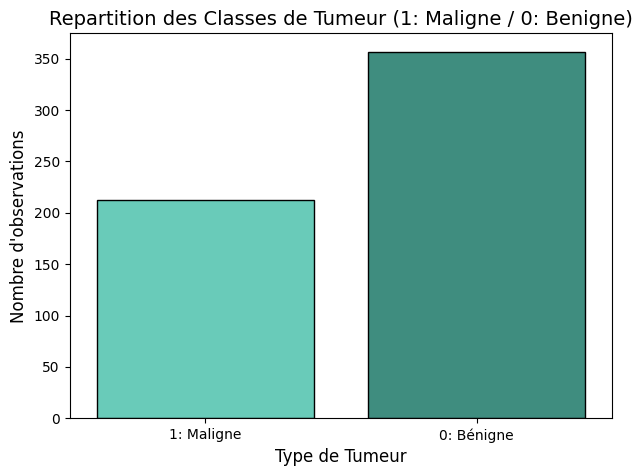

In [28]:
df['target_str'] = df['target'].astype(str)
colors = {'1': '#329a87', '0': '#59dbc3'}
# 2. Création du Diagramme de Répartition
plt.figure(figsize=(7, 5))
ax = sns. countplot(
x='target_str',
data=df,
palette=colors,
edgecolor='black',
hue='target_str',
legend=False)

plt.title('Repartition des Classes de Tumeur (1: Maligne / 0: Benigne)', fontsize=14)
plt.xlabel('Type de Tumeur', fontsize=12)
plt.ylabel("Nombre d'observations", fontsize=12)
plt.xticks([0, 1], ['1: Maligne', '0: Bénigne'])
plt.show()

Montrer la corrélation entre les variables principales.

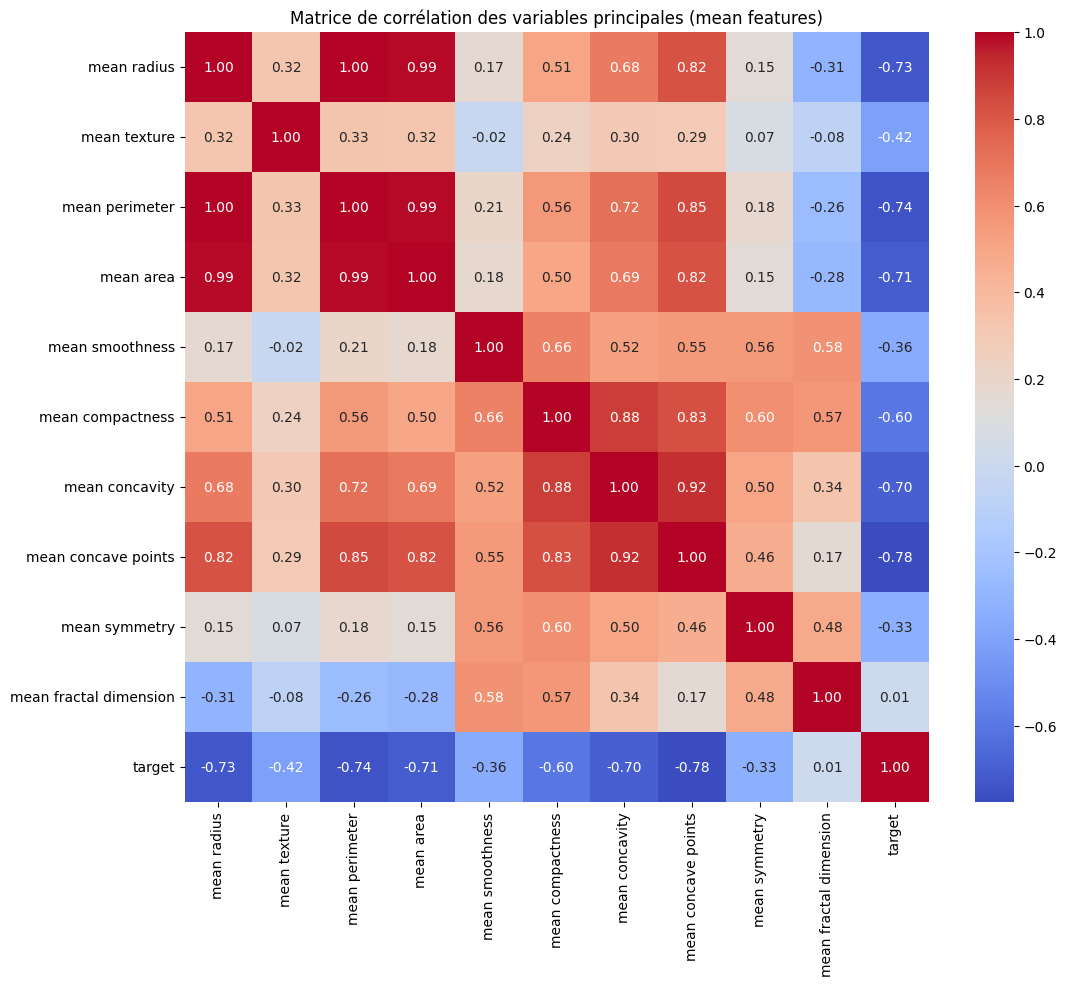

In [43]:
df_cancer = pd.concat([X, y], axis=1)

#sélection des variables principales
mean_features = [col for col in df_cancer.columns if 'mean' in col] + ['target']
df_mean = df_cancer[mean_features]

#calcul de la matrice de corrélation
corr_matrix = df_mean.corr()

#visualisation avec heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des variables principales (mean features)")
plt.show()

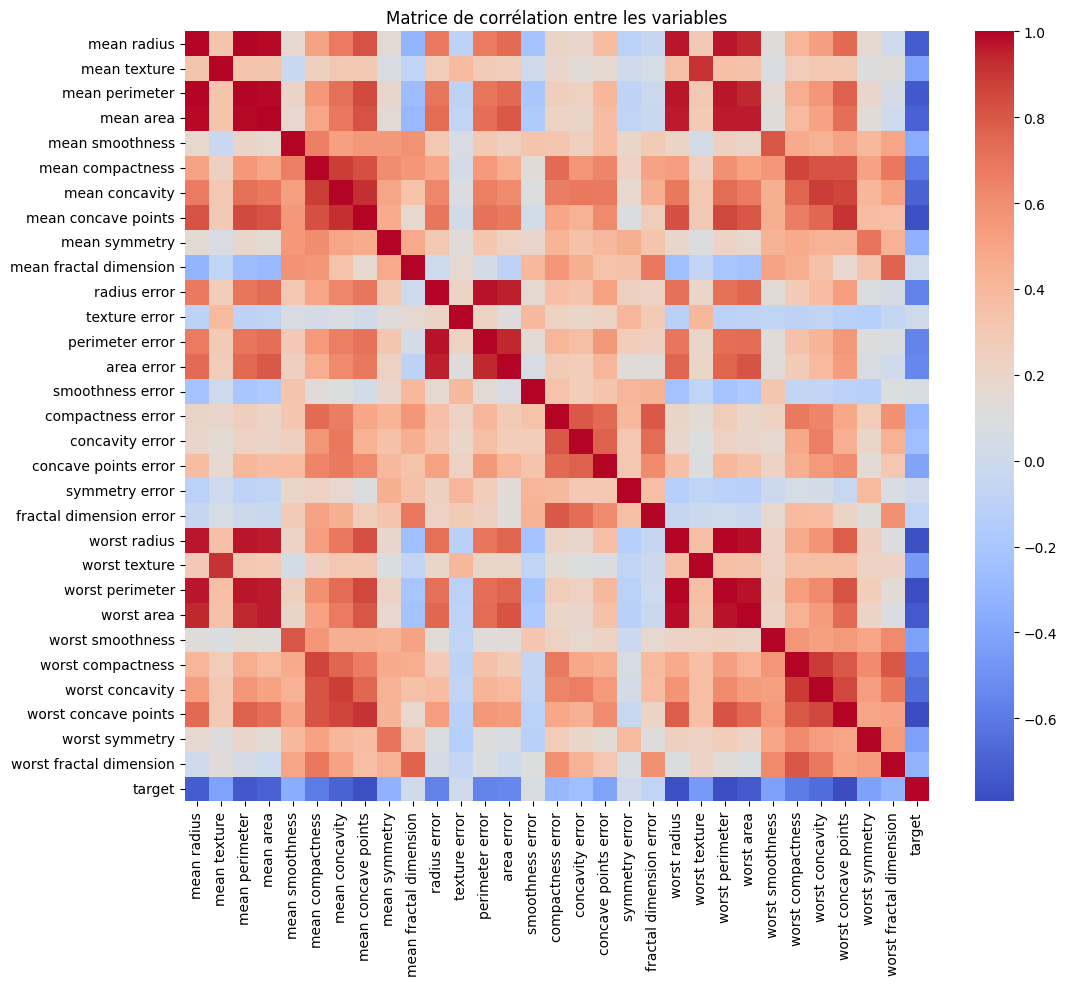

In [26]:
# Matrice de corrélation
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation entre les variables")
plt.show()

 Différences graphiques pour quelques variables

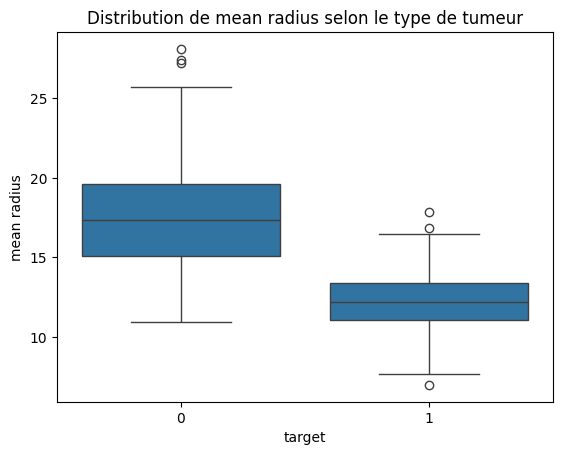

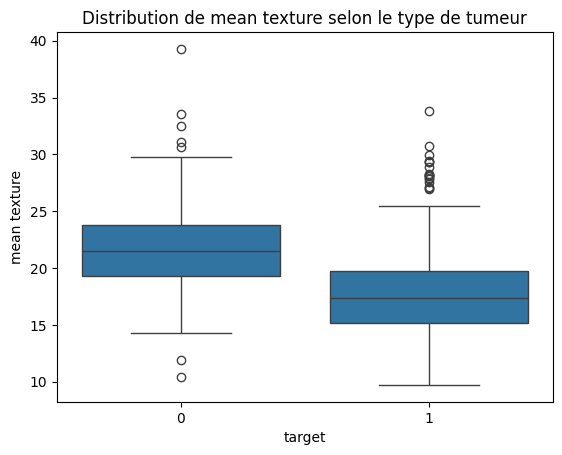

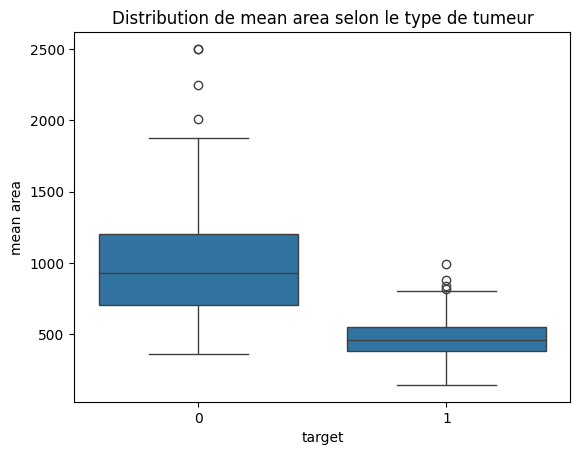

In [27]:
# Différences graphiques pour quelques variables
features_to_plot = ['mean radius', 'mean texture', 'mean area']
for feature in features_to_plot:
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"Distribution de {feature} selon le type de tumeur")
    plt.show()

Illustrer graphiquement les différences entre quelques variables pour les deux
types de tumeur.

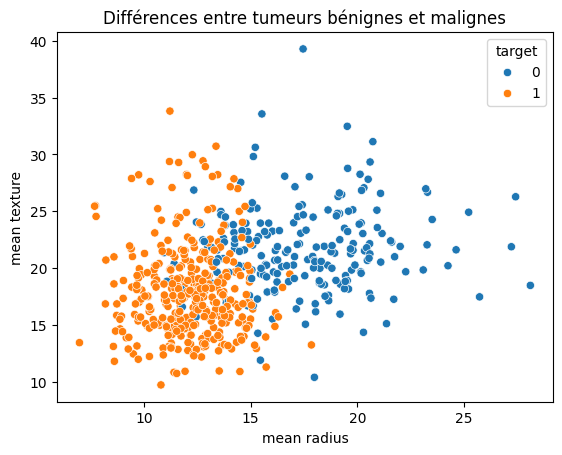

In [41]:
cancer_data = load_breast_cancer()
X_cancer_local = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y_cancer_local = pd.Series(cancer_data.target, name='target')

sns.scatterplot(x=X_cancer_local['mean radius'], y=X_cancer_local['mean texture'], hue=y_cancer_local)
plt.title("Différences entre tumeurs bénignes et malignes")
plt.show()

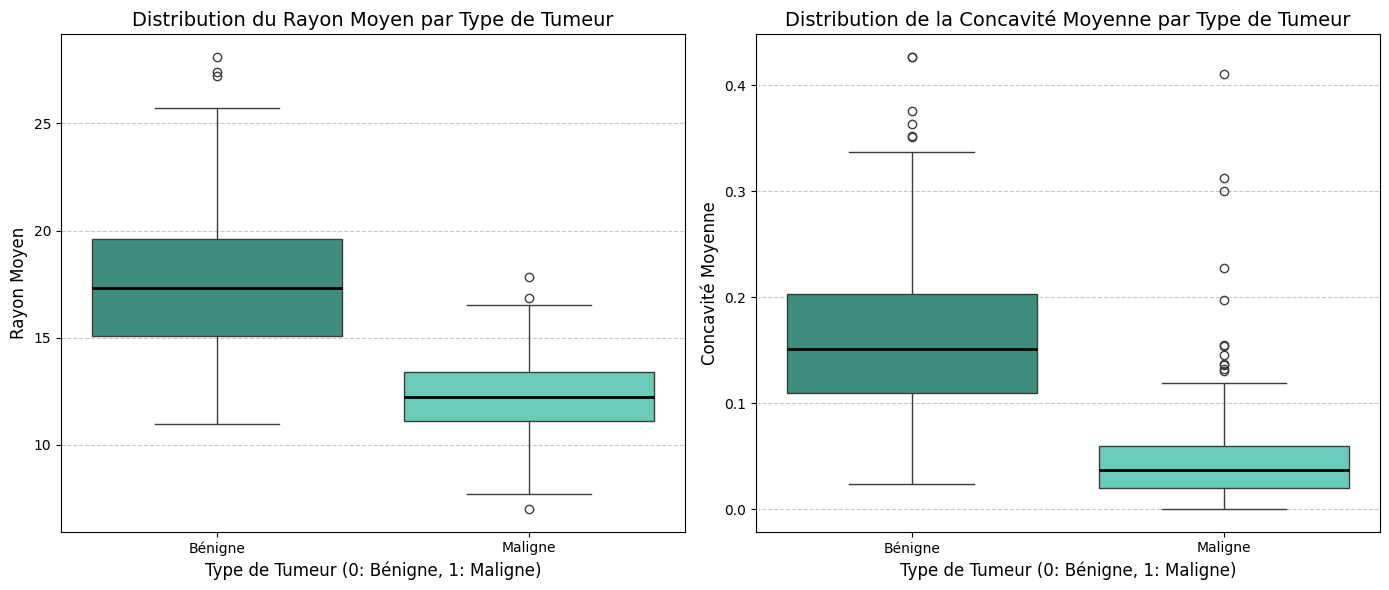

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np # Assurez-vous d'importer numpy si vous utilisez np.int64

# Chargement du dataset (Répété pour s'assurer que df_cancer existe)
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

# CORRECTION: Définition des couleurs avec des CLÉS DE TYPE ENTIER (int)
# Le type 'int' de Python (0 et 1) se mappe correctement au np.int64
boxplot_colors = {0: '#329a87', 1: '#59dbc3'} # Les clés sont 0 et 1 (int)

plt.figure(figsize=(14, 6))

# --- Boxplot 1: Distribution du 'mean radius' par Type de Tumeur ---
plt.subplot(1, 2, 1)
sns.boxplot(
    x='target',
    y='mean radius',
    data=df_cancer,
    palette=boxplot_colors, # Utilise les clés entières
    # AJOUTER HUE et LEGEND=FALSE pour résoudre le FutureWarning
    hue='target',
    legend=False,
    medianprops={'color': 'black', 'linewidth': 2}
)
plt.title('Distribution du Rayon Moyen par Type de Tumeur', fontsize=14)
plt.xlabel('Type de Tumeur (0: Bénigne, 1: Maligne)', fontsize=12)
plt.ylabel('Rayon Moyen', fontsize=12)
plt.xticks([0, 1], ['Bénigne', 'Maligne'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# --- Boxplot 2: Distribution de la 'mean concavity' par Type de Tumeur ---
plt.subplot(1, 2, 2)
sns.boxplot(
    x='target',
    y='mean concavity',
    data=df_cancer,
    palette=boxplot_colors,
    # AJOUTER HUE et LEGEND=FALSE pour résoudre le FutureWarning
    hue='target',
    legend=False,
    medianprops={'color': 'black', 'linewidth': 2}
)
plt.title('Distribution de la Concavité Moyenne par Type de Tumeur', fontsize=14)
plt.xlabel('Type de Tumeur (0: Bénigne, 1: Maligne)', fontsize=12)
plt.ylabel('Concavité Moyenne', fontsize=12)
plt.xticks([0, 1], ['Bénigne', 'Maligne'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Étape 3 : Prétraitement

 Séparer les variables explicatives et la variable cible.

In [11]:
# 1. Séparer la variable cible (y)
# La variable cible est la colonne 'target'.
y = df_cancer['target']
X = df_cancer.drop(['target'], axis=1)
print(f"Variables Explicatives (X) : {X.shape[1]} colonnes (features)")
print(f"Variable Cible (y) : {y.shape[0]} observations")

Variables Explicatives (X) : 30 colonnes (features)
Variable Cible (y) : 569 observations


Normaliser les données si nécessaire.

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Diviser en ensembles d’entraînement et de test (ex. 70/30).

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Étape 4 : Modélisation

 Entraîner deux modèles de classification au choix (ex. KNN, Régression
logistique, Arbre de décision).

** Logistic Regression**

In [14]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

**KNN**

In [37]:

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


Étape 5 : Évaluation

Comparer leurs performances sur le jeu de test.


Pour Logistic Regression model

Calculer Accuracy, Précision, Recall, F1-score.

In [38]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Accuracy :", accuracy_lr)
print("Précision:", precision_lr)
print("Recall :", recall_lr)
print("F1-score :", f1_lr)

Accuracy : 0.9824561403508771
Précision: 0.9906542056074766
Recall : 0.9814814814814815
F1-score : 0.986046511627907


Afficher la matrice de confusion et commenter les erreurs.

In [21]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Matrice de confusion:\n", conf_matrix_lr)

Matrice de confusion:
 [[ 62   1]
 [  2 106]]


Pour KNN model

Calculer Accuracy, Précision, Recall, F1-score.

In [39]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("Accuracy :", accuracy_knn)
print("Précision:", precision_knn)
print("Recall :", recall_knn)
print("F1-score :", f1_knn)

Accuracy : 0.9590643274853801
Précision: 0.963302752293578
Recall : 0.9722222222222222
F1-score : 0.967741935483871


Afficher la matrice de confusion et commenter les erreurs.

In [24]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matrice de confusion:\n", conf_matrix_knn)

Matrice de confusion:
 [[ 59   5]
 [  0 107]]


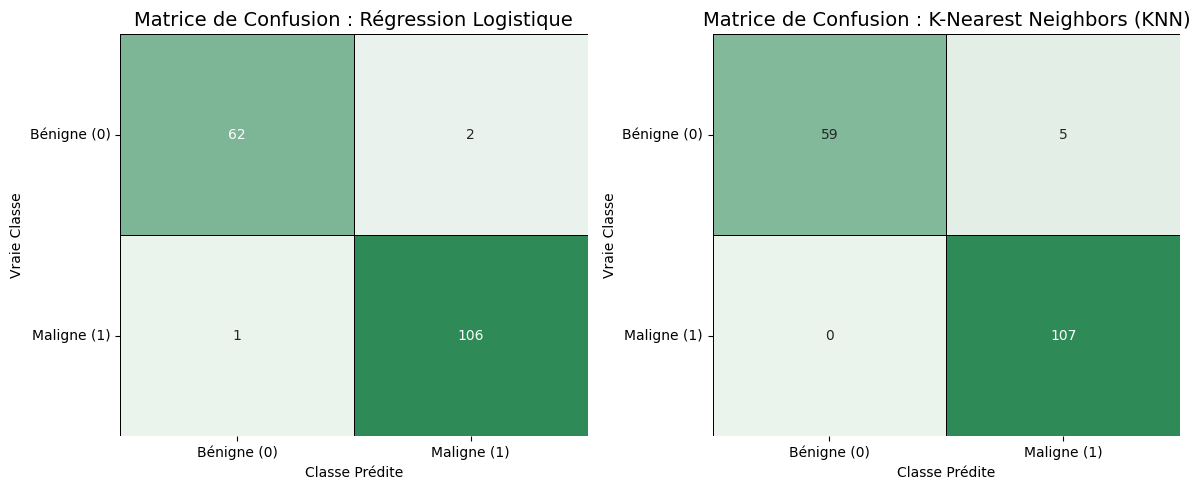

In [22]:
# 3. CALCUL DES MATRICES DE CONFUSION
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# 4. VISUALISATION DES MATRICES DE CONFUSION
plt.figure(figsize=(12, 5))

# Étiquettes pour les axes des matrices
labels = ['Bénigne (0)', 'Maligne (1)']

# Palette de couleurs cohérente (un dégradé de turquoise/vert)
cmap_color = sns.light_palette("seagreen", as_cmap=True)

# --- Matrice de Confusion 1 : Régression Logistique ---
plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, 1er graphique
sns.heatmap(
    cm_lr,
    annot=True,     # Afficher les valeurs numériques
    fmt='d',        # Formater les nombres comme des entiers
    cmap=cmap_color, # Utiliser la palette de couleurs définie
    cbar=False,     # Ne pas afficher la barre de couleur
    linewidths=0.5, # Ajouter des lignes entre les cellules
    linecolor='black', # Couleur des lignes
    yticklabels=labels, # Étiquettes pour l'axe Y (Vraie Classe)
    xticklabels=labels  # Étiquettes pour l'axe X (Classe Prédite)
)
plt.title('Matrice de Confusion : Régression Logistique', fontsize=14)
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.yticks(rotation=0) # S'assurer que les étiquettes de l'axe Y ne sont pas inclinées

# --- Matrice de Confusion 2 : K-Nearest Neighbors (KNN) ---
plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, 2ème graphique
sns.heatmap(
    cm_knn,
    annot=True,
    fmt='d',
    cmap=cmap_color,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    yticklabels=labels,
    xticklabels=labels
)
plt.title('Matrice de Confusion : K-Nearest Neighbors (KNN)', fontsize=14)
plt.ylabel('Vraie Classe')
plt.xlabel('Classe Prédite')
plt.yticks(rotation=0)

plt.tight_layout() # Ajuster automatiquement pour eviter chevauchement
plt.show()

Identifier le modèle le plus performant

Evaluation des 2 modeles

In [40]:
def eval_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"--- Évaluation du modèle : {model_name} ---")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Précision: {precision:.4f}")
    print(f"Recall : {recall:.4f}")
    print(f"F1-score : {f1:.4f}")


eval_model(y_test, y_pred_lr, "Régression Logistique")
eval_model(y_test, y_pred_knn, "KNN")

--- Évaluation du modèle : Régression Logistique ---
Accuracy : 0.9825
Précision: 0.9907
Recall : 0.9815
F1-score : 0.9860
--- Évaluation du modèle : KNN ---
Accuracy : 0.9591
Précision: 0.9633
Recall : 0.9722
F1-score : 0.9677


In [41]:
from sklearn.metrics import accuracy_score

# Recalculate accuracy scores to ensure they are defined
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

best_model = "Régression Logistique" if accuracy_lr > accuracy_knn else "KNN"
print("Modèle le plus performant :", best_model)


Modèle le plus performant : Régression Logistique


Étape 6 : Fonction de test

Description de la fonction :

In [27]:
def predict_tumor(features):
    """
    Prend en entrée les caractéristiques d'une tumeur (liste ou dictionnaire)
    Charge le modèle entraîné
    Retourne le type de tumeur prédit : 'Bénigne' ou 'Maligne'
    """
    # Exemple : charger le modèle entraîné
    # model = joblib.load("breast_cancer_model.pkl")

    # Prétraiter les données si nécessaire (normalisation)

    # Prédire avec le modèle
    # prediction = model.predict(features_reshaped)

    # Retourner le résultat lisible
    # return "Maligne" if prediction == 1 else "Bénigne"
    pass  # Ici, on ne code pas réellement la fonction


In [16]:

def predict_tumor(features_data: list, trained_model: KNeighborsClassifier, scaler: StandardScaler, feature_names: list) -> str:
    """
    Fonction de test qui prend les 30 caractéristiques brutes, les standardise
    avec le scaler entraîné et retourne le diagnostic.
    """
    if len(features_data) != 30:
        return f"Erreur: 30 caractéristiques sont requises, {len(features_data)} fournies."

    # 1. Mise en forme et Standardisation
    data_df = pd.DataFrame([features_data], columns=feature_names)
    features_scaled = scaler.transform(data_df)

    # 2. Prédiction
    prediction = trained_model.predict(features_scaled)

    # 3. Retour du résultat lisible
    return "Maligne (Cancer)" if prediction[0] == 1 else "Bénigne (Non-cancéreuse)"


# 1. Scénario Bénin (Tumeur très petite/régulière) : Utiliser la moyenne de la classe 0
benign_case = df_cancer[df_cancer['target'] == 0].iloc[:, :30].mean().tolist()
result_benign = predict_tumor(benign_case, best_model, scaler, FEATURE_NAMES)

# 2. Scénario Malin (Tumeur très grande/irrégulière) : Utiliser la moyenne de la classe 1
malignant_case = df_cancer[df_cancer['target'] == 1].iloc[:, :30].mean().tolist()
result_malignant = predict_tumor(malignant_case, best_model, scaler, FEATURE_NAMES)

print(f"Test 1  : Le modèle prédit -> {result_benign}")
print(f"Test 2  : Le modèle prédit -> {result_malignant}")

Test 1 (Sim. Bénigne) : Le modèle prédit -> Bénigne (Non-cancéreuse)
Test 2 (Sim. Maligne) : Le modèle prédit -> Maligne (Cancer)


In [31]:

# -------------------------
# 3) Exemple d'utilisation
# -------------------------
example_tumor = {
    'mean radius': 14.0,
    'mean texture': 20.0,
    'mean perimeter': 90.0,
    'mean area': 600.0,
    'mean smoothness': 0.1,
    'mean compactness': 0.2,
    'mean concavity': 0.1,
    'mean concave points': 0.05,
    'mean symmetry': 0.18,
    'mean fractal dimension': 0.06,
    # ajouter toutes les colonnes nécessaires...
}

pred = predict_tumor(example_tumor)
label = "Maligne" if pred == 1 else "Bénigne"

print(f"\n📌 La tumeur prédite est : {label}")



📌 La tumeur prédite est : Maligne


/tmp/ipython-input-2393344739.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_new.at[0, key] = value
/tmp/ipython-input-2393344739.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_new.at[0, key] = value
/tmp/ipython-input-2393344739.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_new.at[0, key] = value
/tmp/ipython-input-2393344739.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future versi

Explication de l’utilisation dans un contexte médical :

Cette fonction pourrait être intégrée dans un logiciel d’aide au diagnostic.

Lorsqu’un pathologiste ou un médecin obtient les mesures d’une tumeur à partir d’une biopsie, il peut les saisir dans le programme.

La fonction retourne automatiquement si la tumeur est bénigne ou maligne, ce qui peut aider à décider rapidement d’un traitement ou d’analyses complémentaires.

Attention : cette fonction ne remplace pas un diagnostic médical, elle sert seulement d’outil d’aide pour prioriser ou compléter les examens cliniques.

Conclusion

Pour la creation de l'interface

In [16]:
import joblib

# Assurez-vous que ces noms de variables correspondent à votre code (vous avez un modèle final et un scaler)
# Exemple: model_cancer = LogisticRegression().fit(X_train_scaled, y_train)
# Exemple: scaler = StandardScaler().fit(X_train)

# Si vous avez utilisé un autre nom, remplacez-le ci-dessous.
modele_final_cancer = model_lr
scaler_final_cancer = scaler

joblib.dump(scaler_final_cancer, 'cancer_scaler.pkl')
joblib.dump(modele_final_cancer, 'cancer_model.pkl')

print("Fichiers cancer_scaler.pkl et cancer_model.pkl créés.")

Fichiers cancer_scaler.pkl et cancer_model.pkl créés.
